<a href="https://colab.research.google.com/github/finfrierson/data-science-fundamentals/blob/main/Fin_FrieU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import pymc as pm
import arviz as az
#Importing programs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 19.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

My data is looking at the chance of getting the 5 star character I want from a limited banner in genshin impact. There are 2 options when you get a 5 star character; either you get the one you want, or another one from a random assortment that will be grouped together. I will consider the times you get the character you want to be won, and any of the other characters to be lost. Like my data set, I will not be considering that you get a garunteed win after you lose once, I will just be considering when there is a possibility of both losing and winning.

<Axes: >

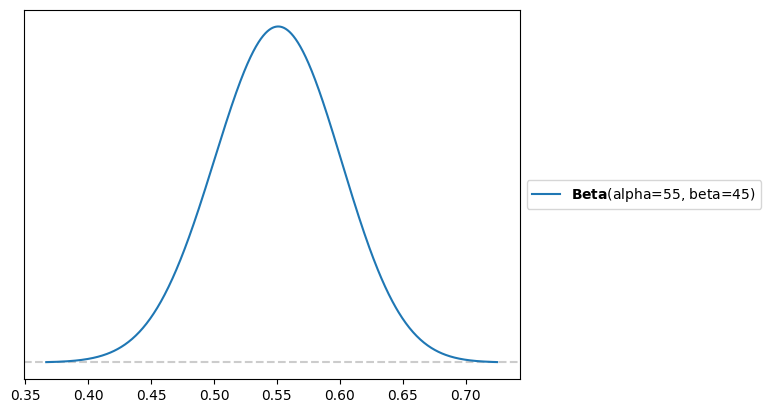

In [3]:
a=55
b=45
beta = pz.Beta(alpha=a,beta=b)
beta.plot_pdf()

My prior is centered around 55%, as that is what a lot of people believe the current chance is. I chose the ratio I did of 55-45 because I figured the data would be centered pretty strictly around one point. I would have done larger, but I do not want to throw off my other models. The split I have put in centers it right at 55% as the mean, which follows my predictions.

My data is taken from a website called paimon.moe, which collected data from tens of thousands of players, totalling 24519 wins, and 22363 losses, which is 46882 total chances. This data was retreived on september 9th at around 10:30 am. The reason which I chose this character to analyze is because during this update a new mechanic was released that changed the chance of winning, and there are many misconceptions about it, so finding the truth about it would be useful.

In [4]:
#Setting up wins and losses in a variable
w = 24519
l = 22363
#setting up for a later model using a combo of prior data and actual data
alpha = w+a
beta = l+b
combined_model = pz.Beta(alpha=alpha, beta=beta)

In [5]:
wins = np.repeat(1, w)
losses = np.repeat(0, l)
data = np.concatenate( [wins,losses] )
#This combines the wins and losses into one set of data to use

In [6]:
#Creaating the model
with pm.Model() as genshin_pulling_model:
  #First defining the prior
  θ = pm.Beta('θ' , alpha = 55. , beta = 45.)

  #Next defining likelihood
  y = pm.Bernoulli('y', p = θ, observed = data)

  #Sampling from our posterior to get more data, I chose 10000 because I have a lot of data
  sample_data = pm.sample(10000)


<Axes: title={'center': 'θ'}>

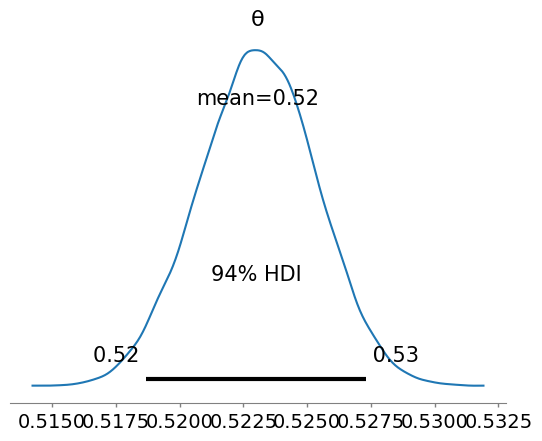

In [7]:
az.plot_posterior(sample_data)
#Visualization of the 10000 data points for a pymc model

This model shows that the mean of the data is around 5.2. The data is highly centered around one spot, but it was at a different percent than I originally thought. I initially thought it would likely be concentrated because of the high amount of data, but I was surprised to see that it was not centered at .55. This shows that my assumptions were innacurate.

<Axes: title={'center': 'θ'}>

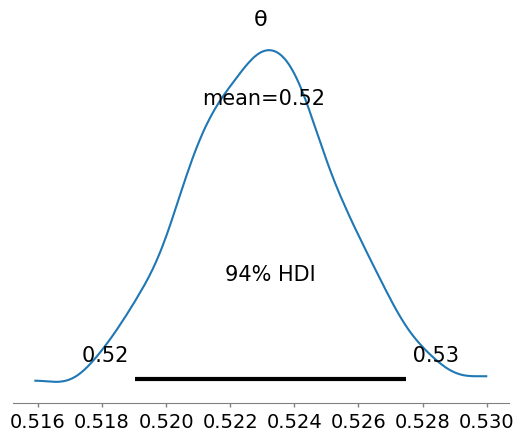

In [8]:
az.plot_posterior( {'θ' : combined_model.rvs(1000)} )
#Here is a display of 1000 values from an analytic model.

Both models show similar results, with a 5.2 mean, but the pymc model presents a more tightly grouped graph. The following code shows predictions of winning or losing in the future.

In [9]:
pm.sample_posterior_predictive(sample_data, model=genshin_pulling_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [10]:
win_or_lose = az.extract(sample_data, group="posterior_predictive")
win_or_lose.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 0, 0, ..., 0, 0, 0])